# Steps
- Vectorize it
- Split test and train.
- Report the performance ( accuracy, error, f1, recall) 
- save the model.

In [1]:
import re
import json
import pickle
import numpy as np
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import tree
import sklearn.metrics
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import chi2
import random
%matplotlib inline

In [2]:
from sklearn.externals import joblib

<h5> Now loading a big dataset </h5>

In [3]:
import pandas as pd
ds = pd.read_csv("/home/ubuntu/temp/ds_train_bigdata.csv", sep="\t")
ds_test = pd.read_csv("/home/ubuntu/temp/ds_rse_test.csv", sep="\t")

FileNotFoundError: File b'/home/ubuntu/temp/ds_train_bigdata.csv' does not exist

In [4]:
ds.head()

NameError: name 'ds' is not defined

In [40]:
ds_test.head()

,stars,text
0,5,Amazing place for lunch.\n\nThe salads are del...
1,5,Here is a short list of why Isshin is perfect;...
2,4,Really delicious pizza - you can tell that the...
3,4,"I'd never been to a Cafe Rio before, so I went..."
4,4,"I had the spinach enchilada, and it was delici..."


In [41]:
ds.shape, ds_test.shape

((2912500, 2), (308919, 2))

In [42]:
ds['Y'] = ds['stars'] > 3 
ds_test['Y'] = ds_test['stars'] > 3 

In [43]:
ds.head()

,stars,text,Y
0,4,Love Marche and have since I went as a kid to ...,True
1,5,Every dish we tried was cooked to perfection w...,True
2,5,yum yum yum!\n\nWent with a party of four - we...,True
3,3,I get the whole rustic coffee shop feel that i...,False
4,4,The standard for decor and atmosphere for Mont...,True


In [44]:
X_train = ds['text']
y_train = ds['Y'].astype(int)
X_test = ds_test['text']
y_test = ds_test['Y'].astype(int)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2912500,), (2912500,), (308919,), (308919,))

<h5> 
Convert a collection of text documents to a matrix of token counts </h5>

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html"> read more on CountVectorizer </a>

In [46]:
vectorizer = CountVectorizer(min_df=5, max_df=1.0, binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [35]:
# encoding=utf8  
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

In [36]:
import sys
sys.getdefaultencoding()

'utf8'

In [47]:
def save_vectorizer():
    pickle.dump(vectorizer, open("models/"+str(np.random.randint(100))+'vectorizer-2GB-RSE.sav', 'wb'))
    !ls -lrth models/*.sav

In [50]:
joblib.dump(vectorizer, 'models/v.dat')

['models/v.dat']

In [48]:
save_vectorizer()

<h5> Shape of Training and Test data set </h5>

In [55]:
X_train_vec.shape, X_test_vec.shape, y_train.shape, y_test.shape

((2912500, 124688), (308919, 124688), (2912500,), (308919,))

<h5> Features extracted after Vectorization </h5>

In [56]:
f = pd.DataFrame(vectorizer.get_feature_names())

In [57]:
f[3000:4000:200]

,0
3000,abundant
3200,accompagnées
3400,acommodate
3600,ade
3800,adult


## BernoulliNB
Naive Bayes classifier for multivariate Bernoulli models.

Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html"> docs </a>

In [82]:
clf = BernoulliNB()
clf.fit(X_train_vec, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [83]:
y_predict = clf.predict(X_train_vec)
accuracy_score(y_train[:], y_predict)

0.7560343347639485

In [84]:
y_predict = clf.predict(X_test_vec)
accuracy_score(y_test[:], y_predict)

0.7533528206423042

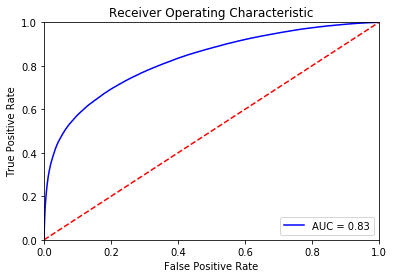

In [85]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test_vec)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test[:], preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> Logistic Regression (aka logit, MaxEnt) classifier. </a>



In [70]:
clf = LogisticRegression(penalty='l2', C = 0.001)
clf.fit(X_train_vec, y_train)
y_predict = clf.predict(X_train_vec)
y_proba = clf.predict_proba(X_test_vec)

print("Accuracu against training data", accuracy_score(y_train[:], y_predict))

y_predict = clf.predict(X_test_vec)
y_proba = clf.predict_proba(X_test_vec)

print("Accuracu against test data", accuracy_score(y_test[:], y_predict))

('Accuracu against training data', 0.8901036909871245)
('Accuracu against test data', 0.8907642456436801)


In [86]:
def save_clf(c):
    pickle.dump(c, open("models/"+str(np.random.randint(100))+'clf_-01.dat', 'wb'))

In [87]:
save_clf(clf)

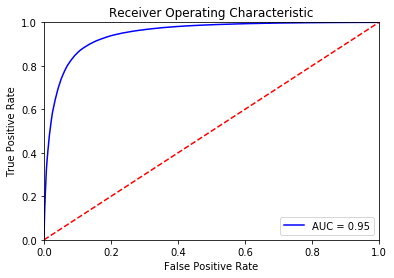

In [76]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test_vec)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test[:], preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Using Neural Network

In [77]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train_vec, y_train)       

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [78]:
y_predict = clf.predict(X_train_vec)

print(accuracy_score(y_train[:], y_predict))

0.9003042060085837


In [79]:
y_predict = clf.predict(X_test_vec)
print(accuracy_score(y_test[:], y_predict))

0.8968467462344498


In [81]:
save_clf(clf)